In [1]:
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

appName = "Generate Twitter Dataset"
spark = SparkSession.builder.appName(appName).getOrCreate()

In [10]:
epidemic_data = spark.read.csv("../datasets/epidemic_train.csv", header=True, inferSchema=True)
epidemic_data.show(2)
epidemic_data = epidemic_data.toPandas()

+-----+----------+-----+--------+------+--------+--------+
|index|      date|cases|newCases|deaths|positive|negative|
+-----+----------+-----+--------+------+--------+--------+
|    0|2020-01-29|    5|       0|     0|       0|       0|
|    1|2020-01-30|    6|       1|     0|       0|       0|
+-----+----------+-----+--------+------+--------+--------+
only showing top 2 rows



In [11]:
date = epidemic_data["date"].to_list()
cases = epidemic_data["cases"].to_list()
newCases = epidemic_data["newCases"].to_list()
deaths = epidemic_data["deaths"].to_list()
positive = epidemic_data["positive"].to_list()
negative = epidemic_data["positive"].to_list()

In [16]:
from datetime import datetime
dates_list = [datetime.strptime(d, '%Y-%m-%d').date() for d in date]

C:\Users\regis\AppData\Local\Temp\ipykernel_21852\1581856837.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(dates_list, features[i], marker='', linestyle='-')


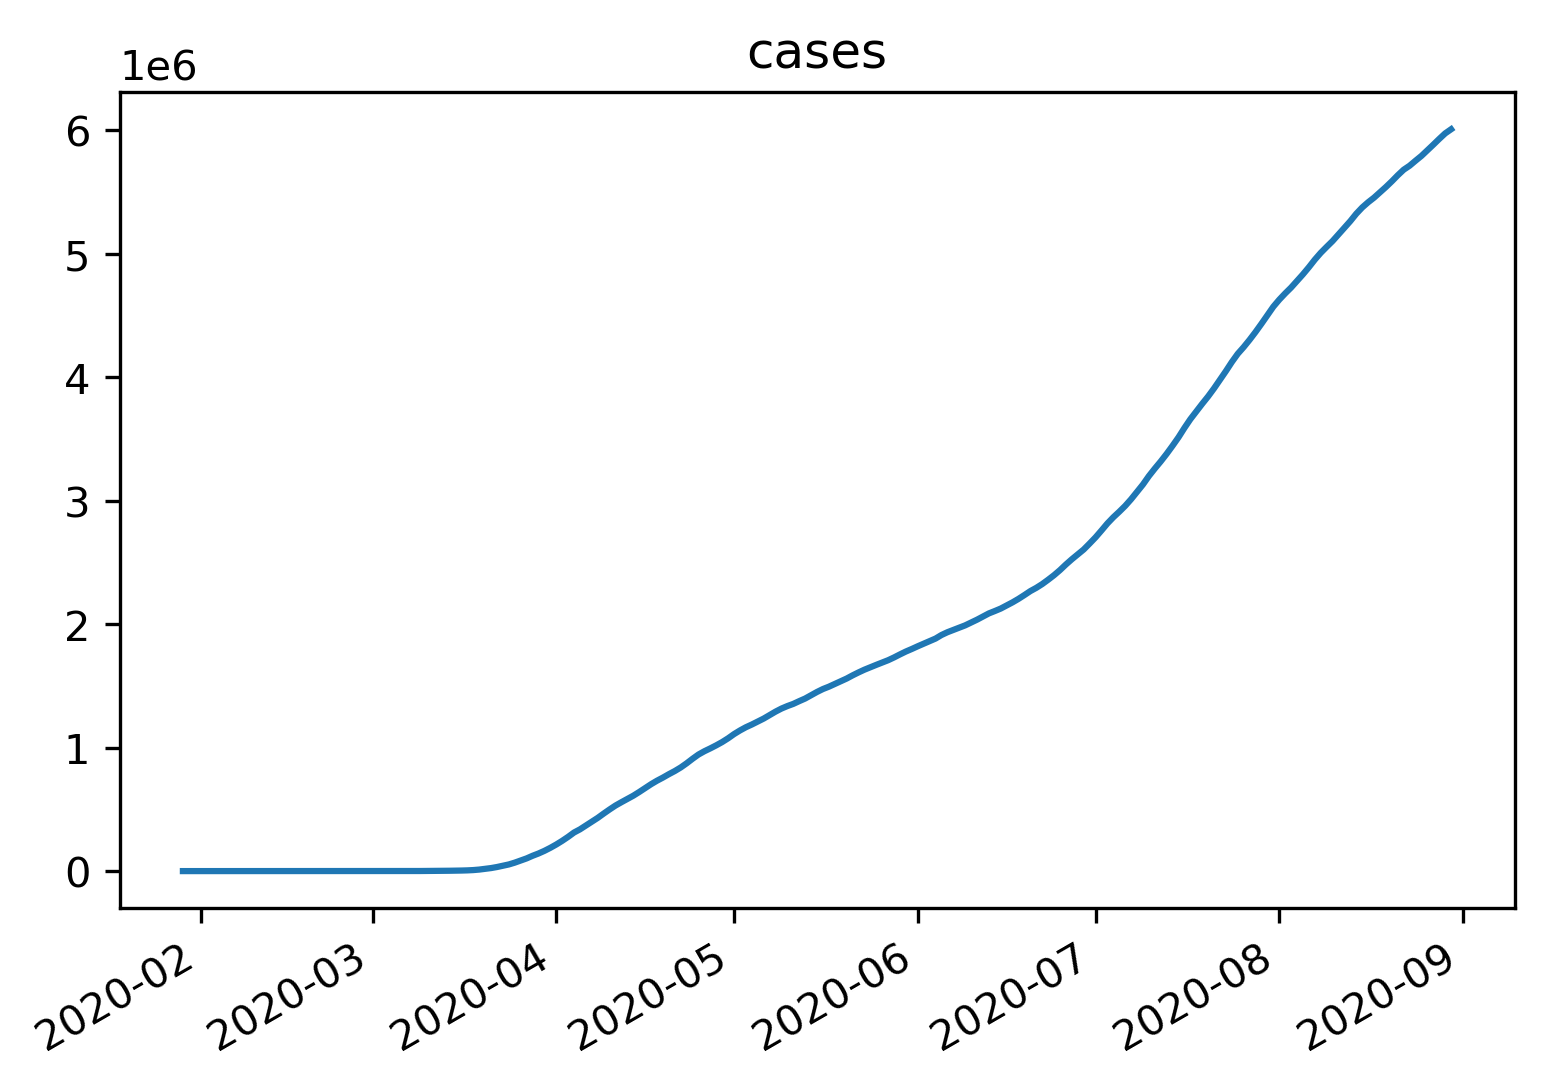

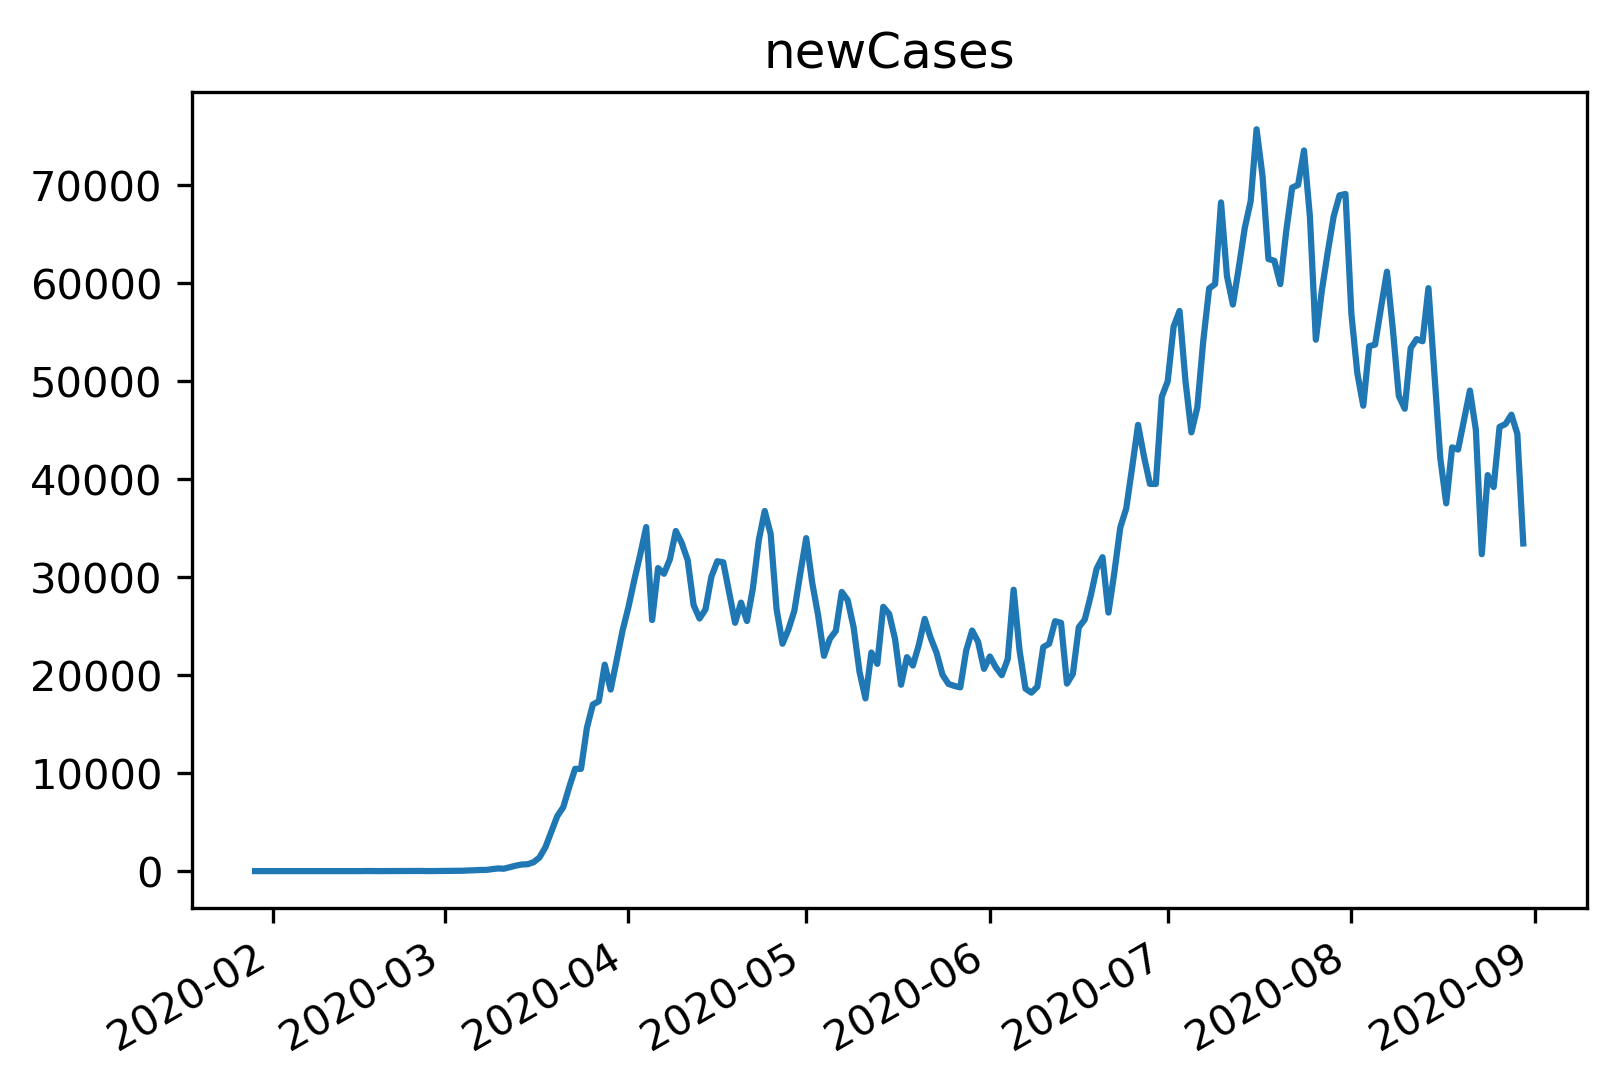

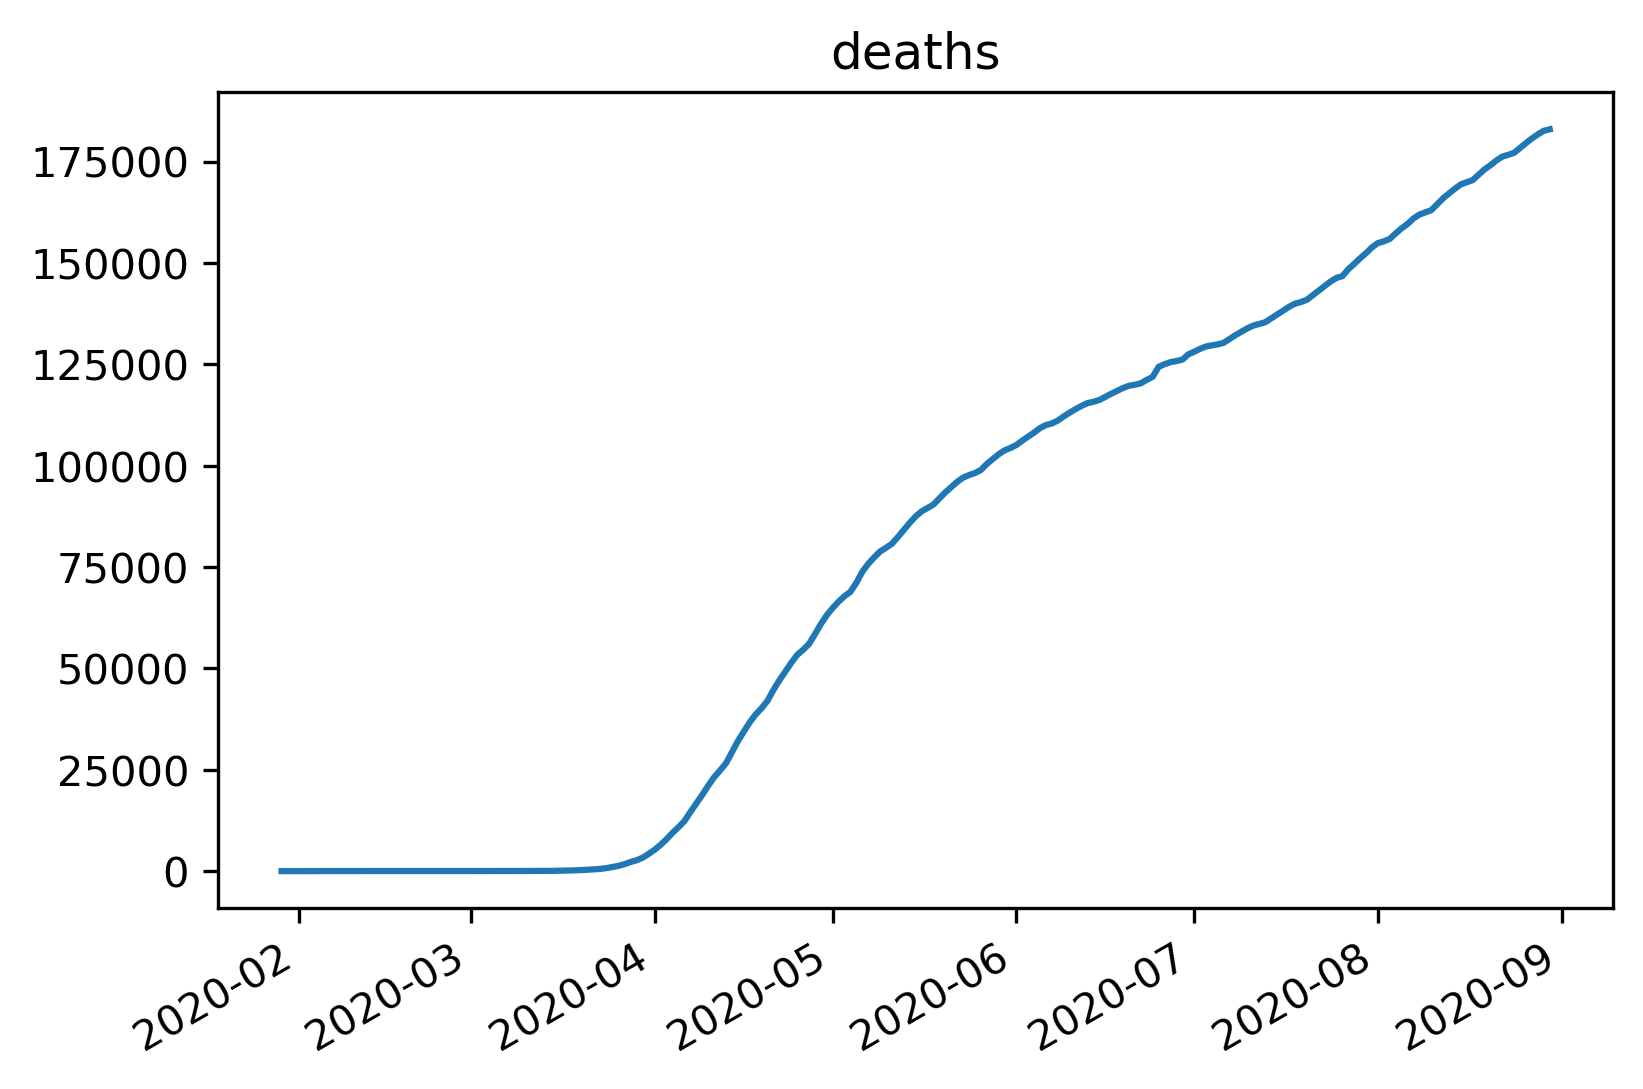

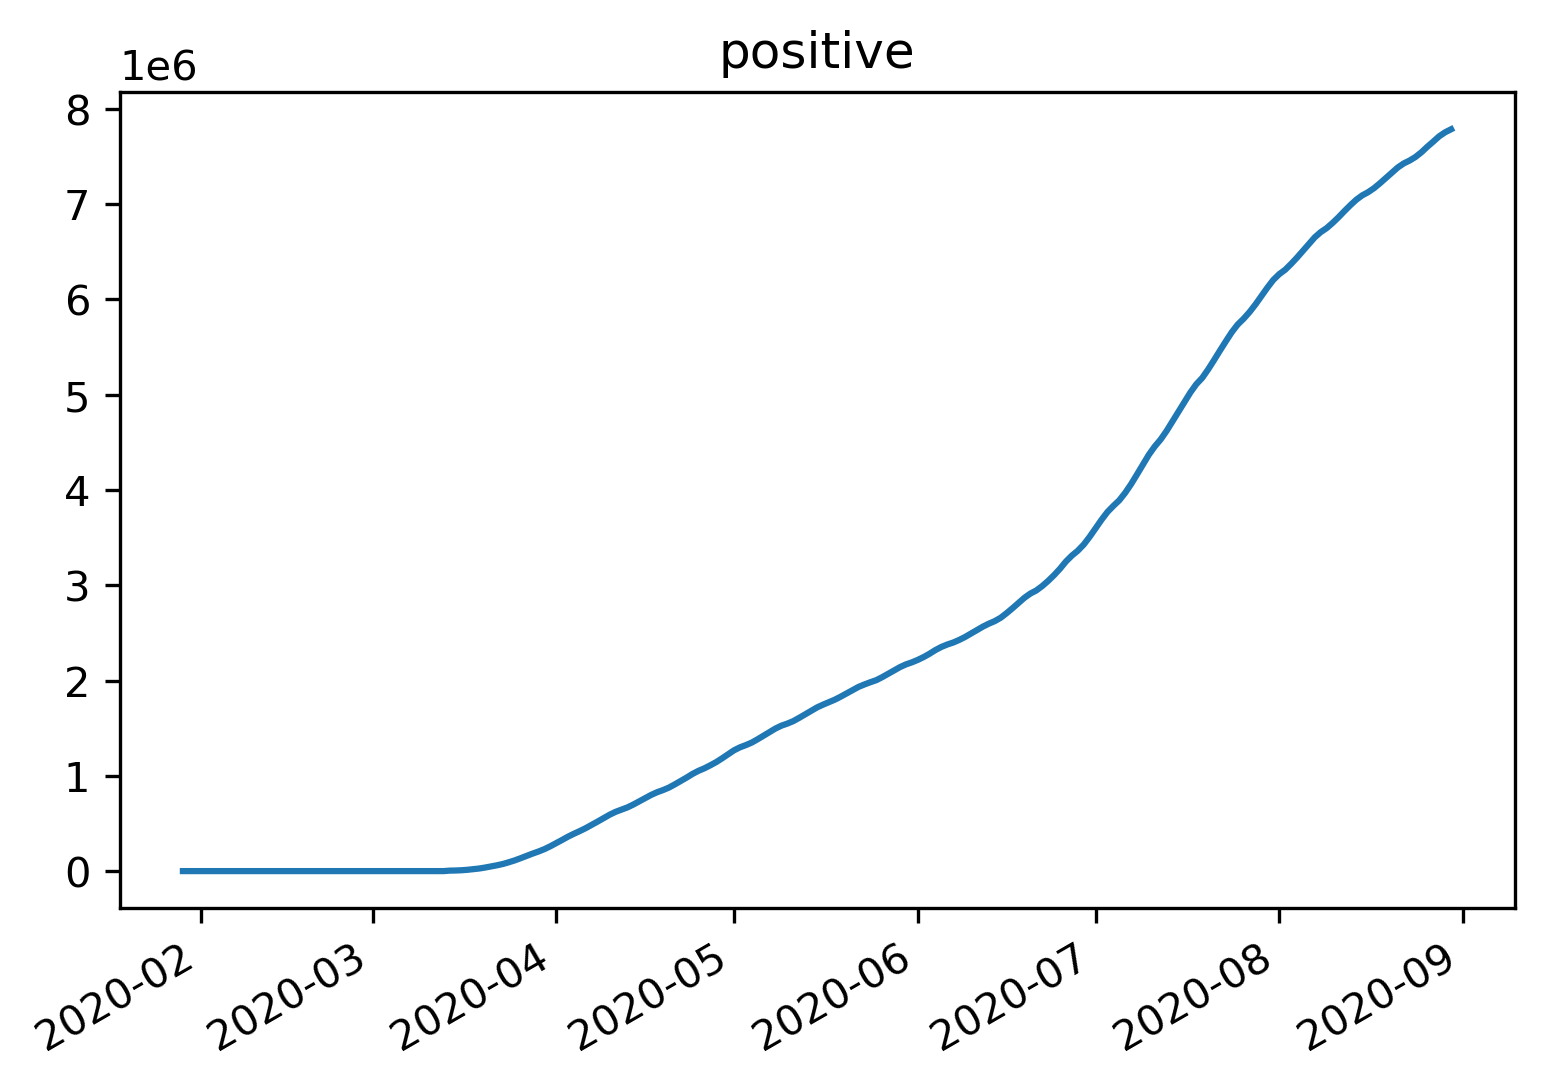

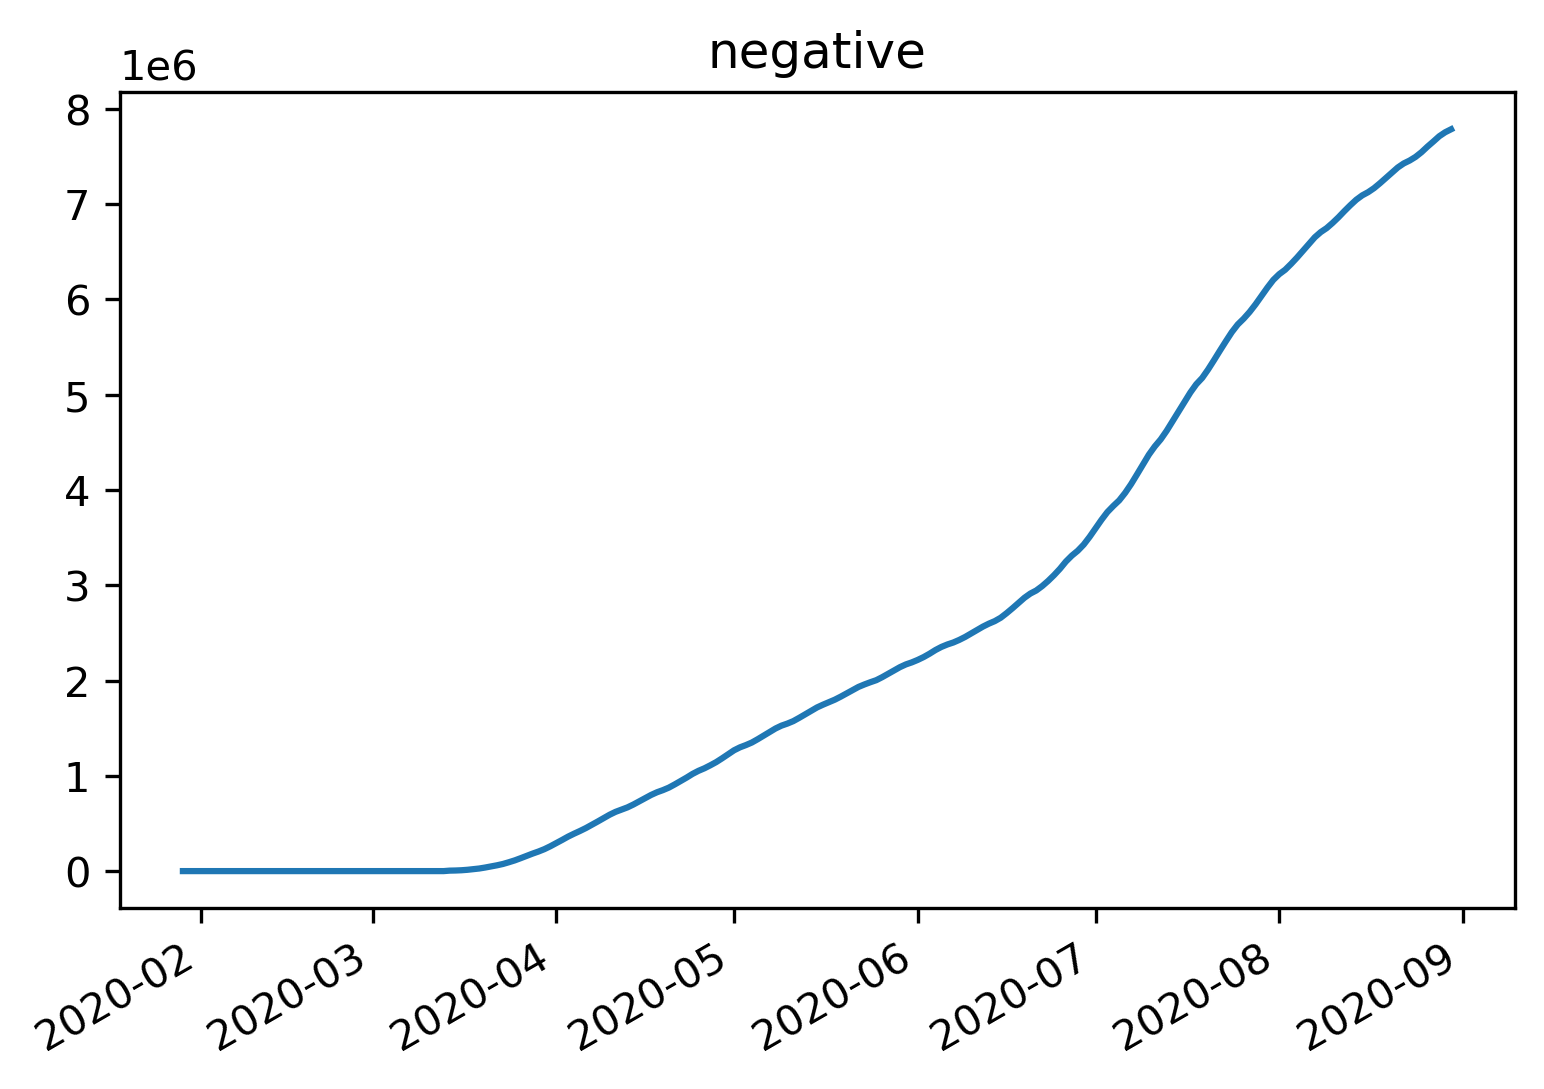

In [26]:
features = [cases, newCases, deaths, positive, negative]
titles = ["cases", "newCases", "deaths", "positive", "negative"]

import matplotlib.pyplot as plt

for i in range(len(features)):
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300

    fig, ax = plt.subplots()
    ax.plot_date(dates_list, features[i], marker='', linestyle='-')
    ax.set_aspect('auto')
    fig.autofmt_xdate()

    plt.title(titles[i])

    # plt.legend(['Happiness', 'Valence', 'Fear', 'Anger', 'Sadness'])

    plt.show()